MUQING WEN, ZHOUYI QIAN
Spring 2023
CS 443: Bio-inspired Machine Learning
Week 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import tensorflow as tf

import preprocess
import word2vec
import imdb
import som

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

OSError: 'seaborn-v0_8-colorblind' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

### 1. Test Skipgram on a small amount of training dataset

load the email data set into dataset we can use

In [2]:
FOLDER_PATH = 'data/enron/spam'
num_emails = 20
targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(FOLDER_PATH, num_emails=num_emails)

Use Skip-gram to create word embeddings for the email dataset

In [3]:
vocab_sz = len(unique_words)
M = vocab_sz
H = 20
C = vocab_sz
batch_sz = 11

net = word2vec.Skipgram(M, H, C, wt_stdev=0.1)

dev_targets_int = targets_int[0:10]
dev_contexts_int = contexts_int[0:10]
hist_1 = net.fit(dev_targets_int, dev_contexts_int, mini_batch_sz=batch_sz, lr=1e-2, n_epochs=400, print_every=50, verbose=True)

Metal device set to: Apple M1 Pro
Starting to train network ....
Epoch 0/400, Training Loss: 19.20.


2023-04-18 11:09:04.437649: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-18 11:09:04.437860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 50/400, Training Loss: 5.18.
Epoch 100/400, Training Loss: 3.83.
Epoch 150/400, Training Loss: 3.68.
Epoch 200/400, Training Loss: 3.65.
Epoch 250/400, Training Loss: 3.64.
Epoch 300/400, Training Loss: 3.64.
Epoch 350/400, Training Loss: 3.63.


plot the training loss on the dev dataset

In [4]:
def plot_train_loss(train_loss, title="Training Loss for Skip-gram", n_samps=None, batch_sz=None):
    x_train = []

    for i in range(len(train_loss)):
        i_epoch = int(i/ (n_samps / batch_sz))
        x_train.append(i_epoch)

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

    axes.plot(x_train, train_loss, ".g-", markersize=5, label="Train Loss")

    # Axes.set_xlabel(xlabel)
    axes.set_xlabel("Training Epochs")
    axes.set_ylabel("Loss")

    # axes.set_xticks(x_list)
    axes.set_xticklabels(axes.get_xticks(), rotation=0)

    # frameon: Whether the legend should be drawn on a patch (frame).
    axes.legend(loc="lower left", bbox_to_anchor=(1, 0), frameon=True, edgecolor="black")

    axes.set_title(title)
    plt.show()

/var/folders/w9/cc58q4sx1_x2xvcygb70jn2w0000gp/T/ipykernel_13720/2205290549.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


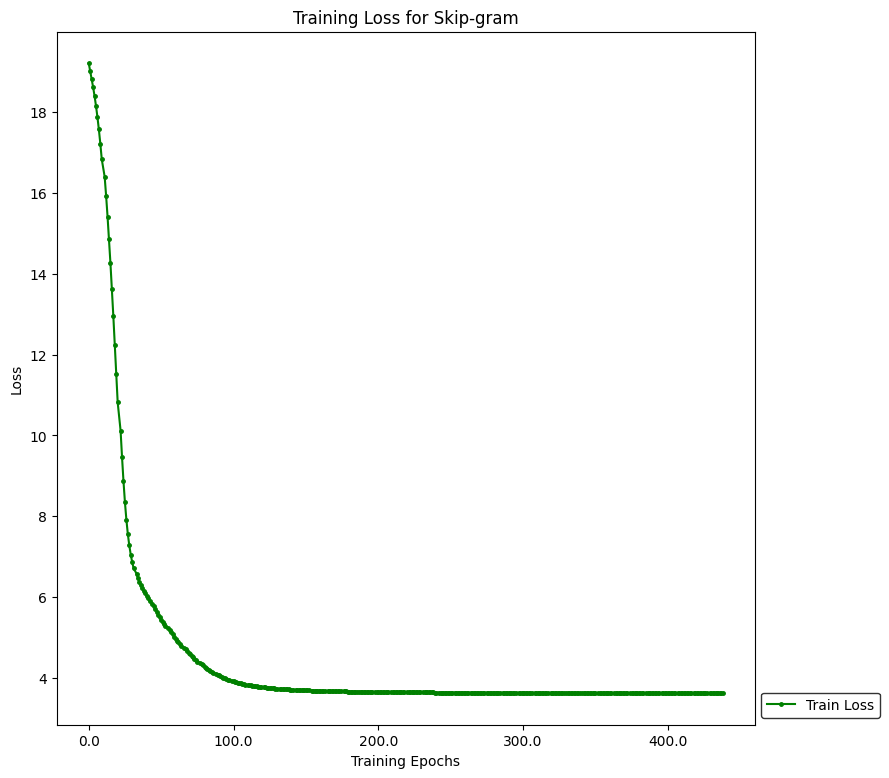

In [5]:
plot_train_loss(hist_1, n_samps=dev_targets_int.shape[0], batch_sz=batch_sz)

### 2. Start to train on a large number of dataset
#### a. Build the training and testing dataset

get a large dataset to train the skipgram

In [6]:
SPAM_FOLDER_PATH = 'data/enron/spam'
num_emails = 200
spam_targets_int, spam_contexts_int, spam_unique_words, spam_word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, num_emails=num_emails)

HAM_FOLDER_PATH = 'data/enron/ham'
ham_targets_int, ham_contexts_int, ham_unique_words, ham_word2ind = preprocess.get_dataset(path2folder1=HAM_FOLDER_PATH, num_emails=num_emails)

targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, path2folder2=HAM_FOLDER_PATH, num_emails=num_emails)

get list of corpus for testing purpose

In [7]:
email_indices_to_extract = list(range(int(num_emails*0.8),num_emails))

spam_test_corpus_list = []
ham_test_corpus_list = []
for index in email_indices_to_extract:
    # extract single one email at a time from the spam and the ham
    email_dat = preprocess.extract_sentences_from_path('data/enron/spam', [index])
    corpus = imdb.make_corpus(email_dat)
    spam_test_corpus_list.append(corpus)

    email_dat = preprocess.extract_sentences_from_path('data/enron/ham', [index])
    corpus = imdb.make_corpus(email_dat)
    ham_test_corpus_list.append(corpus)

train the skipgram on the words from both the spam and the ham class

In [8]:
print(len(targets_int))

33971


In [9]:
vocab_sz = len(unique_words)
M = vocab_sz
H = 200
C = vocab_sz
batch_sz = 2000

net = word2vec.Skipgram(M, H, C, wt_stdev=0.1)

hist_1 = net.fit(targets_int, contexts_int, mini_batch_sz=batch_sz, lr=1e-2, n_epochs=200, print_every=10, verbose=True)

Starting to train network ....
Epoch 0/200, Training Loss: 30.58.
Epoch 10/200, Training Loss: 15.02.
Epoch 20/200, Training Loss: 14.55.
Epoch 30/200, Training Loss: 14.31.
Epoch 40/200, Training Loss: 14.42.
Epoch 50/200, Training Loss: 14.39.
Epoch 60/200, Training Loss: 14.20.
Epoch 70/200, Training Loss: 14.44.
Epoch 80/200, Training Loss: 14.16.
Epoch 90/200, Training Loss: 14.26.
Epoch 100/200, Training Loss: 14.40.
Epoch 110/200, Training Loss: 14.20.
Epoch 120/200, Training Loss: 14.63.
Epoch 130/200, Training Loss: 14.16.
Epoch 140/200, Training Loss: 14.07.
Epoch 150/200, Training Loss: 14.03.
Epoch 160/200, Training Loss: 14.41.
Epoch 170/200, Training Loss: 13.93.
Epoch 180/200, Training Loss: 14.33.
Epoch 190/200, Training Loss: 14.24.


/var/folders/w9/cc58q4sx1_x2xvcygb70jn2w0000gp/T/ipykernel_13720/2205290549.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


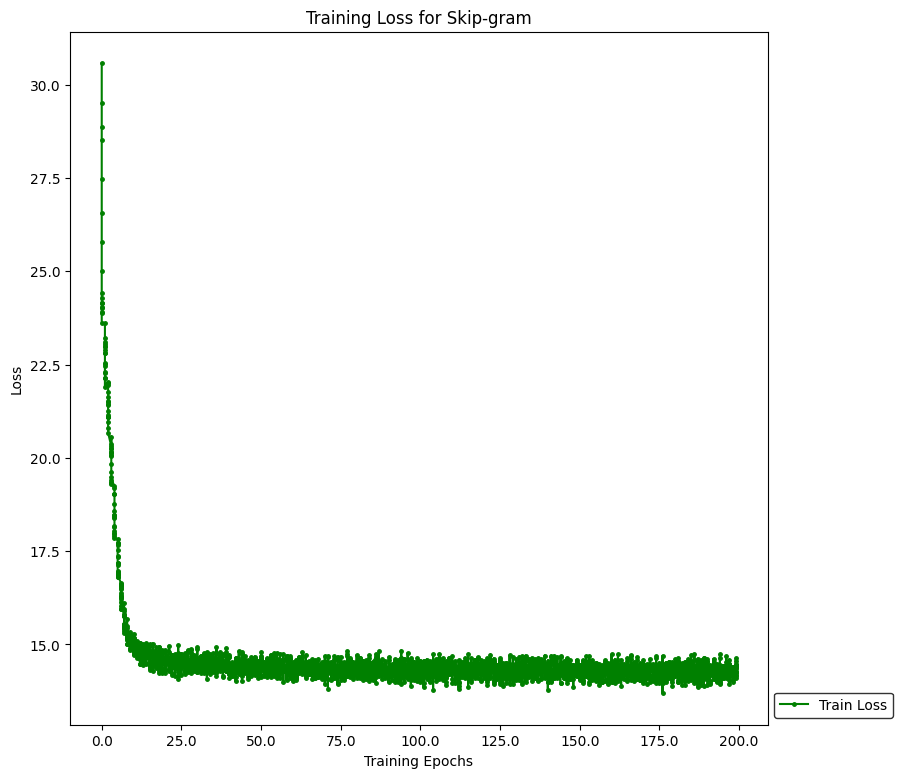

In [10]:
plot_train_loss(hist_1, n_samps=targets_int.shape[0], batch_sz=batch_sz)

b. build training dataset for MLP network

In [11]:
# use a smaller dataset first
SPAM_FOLDER_PATH = 'data/enron/spam'
num_emails = 20
spam_targets_int, spam_contexts_int, spam_unique_words, spam_word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, num_emails=num_emails)

HAM_FOLDER_PATH = 'data/enron/ham'
ham_targets_int, ham_contexts_int, ham_unique_words, ham_word2ind = preprocess.get_dataset(path2folder1=HAM_FOLDER_PATH, num_emails=num_emails)

targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, path2folder2=HAM_FOLDER_PATH, num_emails=num_emails)

In [12]:
word_counter = {} # "word":(count in spam, count in ham)

spam_ind2word = imdb.make_ind2word_mapping(spam_unique_words)
ham_ind2word = imdb.make_ind2word_mapping(ham_unique_words)

for i in spam_targets_int:
    # if the current target word is not recorded, add it to the record
    if spam_ind2word[i] not in word_counter:
        word_counter[spam_ind2word[i]] = [0,0]

    word_counter[spam_ind2word[i]][0] += 1

for i in ham_targets_int:
    if ham_ind2word[i] not in word_counter:
        word_counter[ham_ind2word[i]] = [0,0]

    word_counter[ham_ind2word[i]][1] += 1


In [13]:
class_labels = [] # word: 0 for spam, 1 for ham
for word in unique_words:
    # if the word appears more often in ham, label it as ham
    # otherwise, label it as spam
    if word_counter[word][1] > word_counter[word][0]:
        class_labels.append(1)
    else:
        class_labels.append(0)

construct the numpy array traininig and testing dataset

In [14]:
num_emails = 15

_, _, train_unique_words, _ = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, path2folder2=HAM_FOLDER_PATH, num_emails=num_emails)

In [15]:
test_index_start = len(train_unique_words)
test_unique_words = unique_words[test_index_start:-1]

x_train = net.get_all_word_vectors(word2ind,train_unique_words)
x_test = net.get_all_word_vectors(word2ind,test_unique_words)

y_train = np.array(class_labels[0:test_index_start])
y_test = np.array(class_labels[test_index_start:-1])



start to construct the MLP

In [16]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(756, 200) (756,)
(326, 200) (326,)


In [24]:
H1 = 50
H2 = 1
net = tf.keras.Sequential(
    [tf.keras.layers.Input(shape=x_train.shape[1]),
    tf.keras.layers.Dense(units=H1, activation='relu'),
    tf.keras.layers.Dense(units=H2, activation='sigmoid')]
)
net.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                10050     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,101
Trainable params: 10,101
Non-trainable params: 0
_________________________________________________________________


In [25]:
net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
hist = net.fit(x_train, y_train, batch_size=200, epochs=200, validation_data=(x_test, y_test))


Epoch 1/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0630 - val_accuracy: 0.5736
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0646 - val_accuracy: 0.5736
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0659 - val_accuracy: 0.5736
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0673 - val_accuracy: 0.5736
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0686 - val_accuracy: 0.5736
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0705 - val_accuracy: 0.5736
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0720 - val_accuracy: 0.5736
Epoch 8/200
4/4 [===

In [ ]:
plt.plot(hist.history['accuracy'])
plt.show()